In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv("heart.csv", sep=",")

In [3]:
x = df.drop(columns=["output"])
x = df[["thalachh", "oldpeak", "cp", "caa"]]
y = df["output"]

In [4]:
from imblearn.over_sampling import SMOTE

# smote
smote=SMOTE(sampling_strategy="auto",random_state=50, k_neighbors=6)
x_resampled,y_resampled=smote.fit_resample(x,y)

y_counts=y_resampled.value_counts()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state = 0)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier().fit(x_train, y_train)

In [7]:
importances = rf_classifier.feature_importances_

# Asociar cada importancia con su característica correspondiente
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns.tolist(), importances)]

# Ordenar las características por importancia
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Imprimir la importancia de cada característica
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

age: 0.3
sex: 0.29
cp: 0.22
trtbps: 0.19


In [8]:
# print (f'Train Accuracy - : {rf_classifier.score(x_train,y_train):.3f}')
# print (f'Test Accuracy - : {rf_classifier.score(x_test,y_test):.3f}')

In [9]:
y_pred_test = rf_classifier.predict(x_test)

y_pred = y_pred_test

X_test = x_test
# View accuracy score

accuracy = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for positive class

AUC = roc_auc_score(y_test, y_proba)

C:\Users\User Dell\AppData\Local\Temp\ipykernel_18080\1751892944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= name_metrics, y= dato_metrics, palette="viridis")


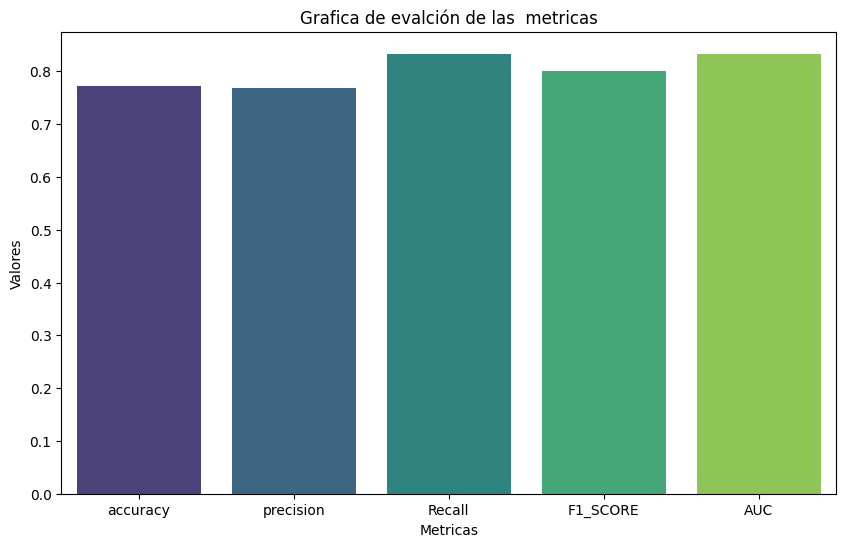

In [10]:
name_metrics=["accuracy", "precision", "Recall", "F1_SCORE", "AUC"]
dato_metrics=[accuracy,precision,recall,f1,AUC]

plt.figure(figsize=(10,6))
sns.barplot(x= name_metrics, y= dato_metrics, palette="viridis")
plt.title("Grafica de evalción de las  metricas")
plt.xlabel("Metricas")
plt.ylabel("Valores")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.77      0.83      0.80        36

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.77      0.77      0.77        66



<Axes: >

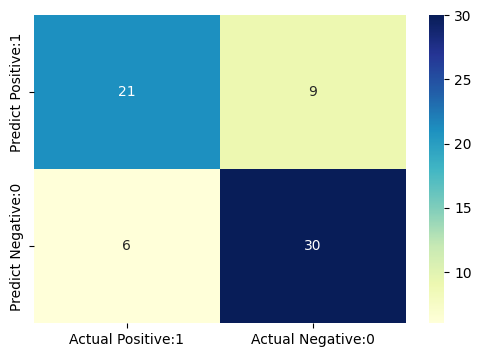

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
